In [29]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import defaultdict

In [30]:
data = pd.read_csv("data.csv", header = 0)
data = data.dropna()

In [31]:
data.count()

Job Id              997
Experience          997
Qualifications      997
Salary Range        997
location            997
Country             997
latitude            997
longitude           997
Work Type           997
Company Size        997
Job Posting Date    997
Preference          997
Contact Person      997
Contact             997
Job Title           997
Role                997
Job Portal          997
Job Description     997
Benefits            997
skills              997
Responsibilities    997
Company             997
Company Profile     997
dtype: int64

In [32]:
data.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [33]:
salaries = data['Salary Range']
salaries.head()

0     $59K-$99K
1    $56K-$116K
2    $61K-$104K
3     $65K-$91K
4     $64K-$87K
Name: Salary Range, dtype: object

In [34]:
def group_salaries(data):
  min_salaries = []
  max_salaries = []
  for sal_range in data:
    min_max = sal_range.split("-")
    sal_begin = int(min_max[0][1:-1]) * 1000
    sal_end = int(min_max[1][1:-1]) * 1000
    min_salaries.append(sal_begin)
    max_salaries.append(sal_end)

  max_salary = max(max_salaries)
  min_salary = min(min_salaries)
  num_bins = (max_salary - min_salary) // 10000
  avgs_per_sal_range = [min_salaries[i] + max_salaries[i] / 2 for i in range(len(min_salaries))]

  return avgs_per_sal_range, num_bins

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


75000 7
7


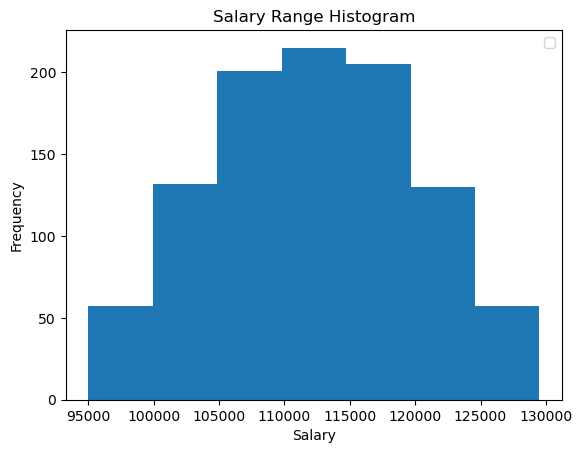

In [35]:
salaries, bins = group_salaries(salaries)
print(bins)
plt.hist(salaries, bins=bins)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Range Histogram')
plt.legend()

In [36]:
def group_salaries(data):
    """
    Group salaries into < 50k, 50-75k, 75 - 100k, above 100k 
    TODO look at US income ranges or income distribution later
    """
    groups = {}
    selected_data = data[["Job Id", "Salary Range"]]

    # for id, salary in selected_data:
    #     salary = 

In [37]:
fig = px.scatter_geo(data, 
                     lat='latitude', 
                     lon='longitude', 
                     color='Country',
                     hover_name='Country', 
                     title='Job Posting Locations')
fig.show()

/Users/rohuihu/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [38]:
def group_qualifications(data):
    groups = defaultdict(list)

    for i in range(1, len(data)):
        degree = data["Qualifications"].iloc[i]
        if degree[0] == "B":
            groups['Bachelors'].append(i)
        elif degree[0] == "M":
            groups['Masters'].append(i)
        else:
            groups["Doctoral"].append(i)
    
    return groups

<BarContainer object of 3 artists>

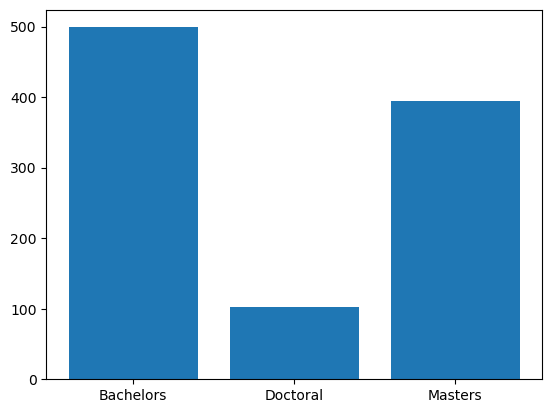

In [39]:
qualification_grouping = group_qualifications(data)
qualification_counts = [len(i) for i in qualification_grouping.values()]
plt.bar(qualification_grouping.keys(), qualification_counts)